# HW 2

Avinash Joshi

AMATH 422 Au 22

12 October 2022

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize

plt.rcParams['figure.dpi']= 200
plt.rcParams['axes.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'

## I

In [2]:
A = np.array([[0,1,5,.5], [0.5, 0, 0, 0], [0,0.9,0,0], [0,0,0.95,0]])

n_pop = np.zeros((4, 51))
n_pop[:,0] = np.array([100,100,100,100])

Tmax = 50
iter_arr=np.arange(Tmax)

for t in iter_arr:
    n_pop[:,t+1]=np.matmul(A,n_pop[:,t])

In [3]:
N_t = np.sum(n_pop, axis = 0)
w_a = np.zeros((4,51))


for i in range(len(N_t)):
    for j in range(4):
        w_a[j,i] = n_pop[j,i]/N_t[i]

logN = np.log(N_t)

lamb_lm = np.exp(np.polyfit(np.concatenate((iter_arr, np.array([50]))), logN, deg = 1)[0])

print(f'λ is equal to about {np.round(lamb_lm, decimals = 4)} using Leslie Matrices')

λ is equal to about 1.4626 using Leslie Matrices


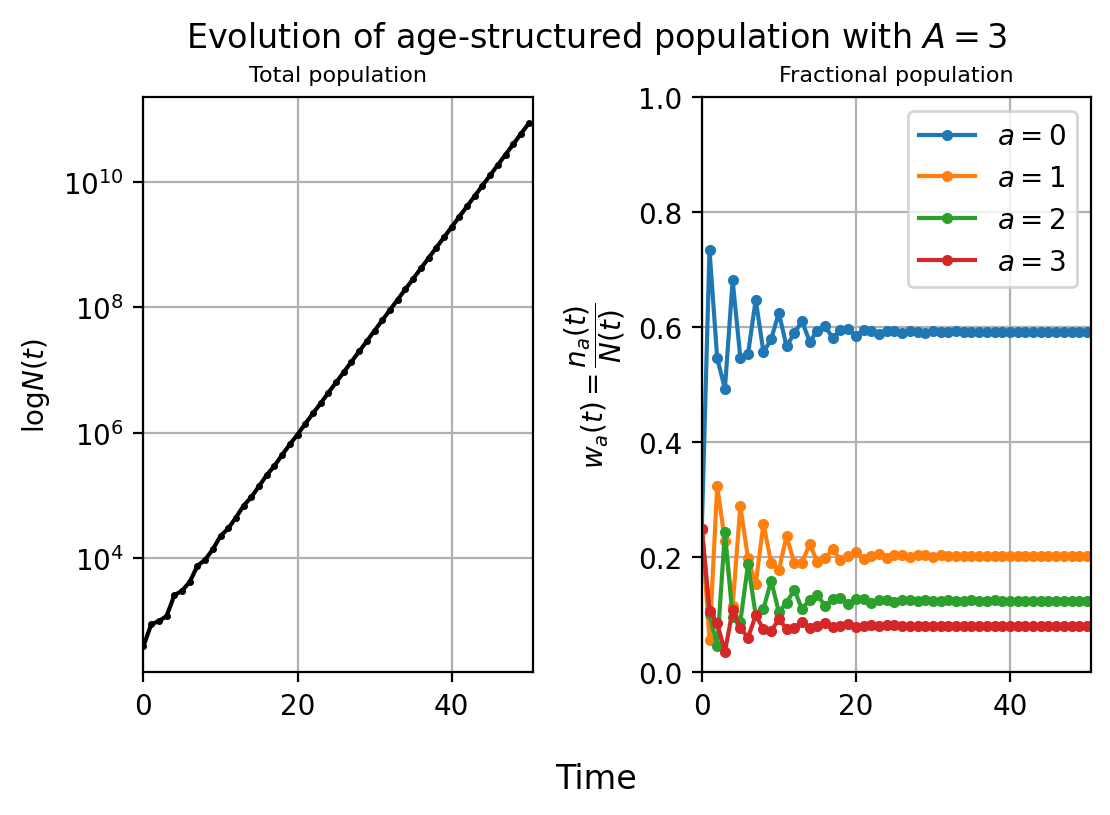

In [4]:
label = ['$a = 0$', '$a = 1$', '$a = 2$', '$a = 3$']

fig, ax = plt.subplots(1,2)
fig.tight_layout(pad = 3)
ax[0].plot(np.concatenate((iter_arr, np.array([50]))), N_t, 'k.-', ms = 3, label = '$N(t)$')
for i in range(4):
    ax[1].plot(np.concatenate((iter_arr, np.array([50]))), w_a[i,:], '.-', label = label[i])
ax[1].legend()
fig.supxlabel('Time')
ax[0].set_yscale('log')
ax[0].set_ylabel('log$N(t)$')
ax[1].set_ylabel('$w_a(t) = \dfrac{n_a(t)}{N(t)}$')
ax[0].set_title('Total population', fontsize = 8)
ax[1].set_title('Fractional population', fontsize = 8)
fig.suptitle('Evolution of age-structured population with $A=3$')
ax[0].grid()
ax[1].grid()
ax[0].set_xlim([0,50.5])
ax[1].set_xlim([0,50.5])
ax[1].set_ylim([0,1])
plt.show()

In [5]:
def eulot_func(lam,Ia_arr,fa_arr):
        """compute the Euler-Lotka sum, taking as arguments a scalar and two 1-D numpy arrays"""
        length_of_array=Ia_arr.size
        age_arr=np.arange(0,length_of_array)
        temp_arr=lam**(-(age_arr+1))*Ia_arr*fa_arr 
        return sum(temp_arr) -1 

Ia_arr=np.array([1,.5,.5*.9,.5*.9*.95])
fa_arr=np.array([0,1,5,.5])

In [6]:
lambda_min=0.3
lambda_max=3

lambda_arr=np.linspace(lambda_min,lambda_max,100) 

G_arr=np.zeros(lambda_arr.size)

iter_arr=np.arange(lambda_arr.size)

for j in iter_arr:
    G_arr[j]=eulot_func(lambda_arr[j],Ia_arr,fa_arr)

left_bracket=0.1
right_bracket=5
args=(Ia_arr,fa_arr)

lamb_el = scipy.optimize.brentq(eulot_func,left_bracket,right_bracket,args)

print(f'λ is equal to about {np.round(lamb_el, decimals = 4)} using the Euler-Lokta Formula')

λ is equal to about 1.4624 using the Euler-Lokta Formula


My predictions for $\lambda$ from both the Euler-Lokta formulas and the Leslie matrix simulations are accurate from each other to 3 decimal places, i.e., $\lambda = 1.462$. This is to be expected because both methods are valid ways of numerically approximating the growth rate of the population.

## II

It does not matter what specific $p_a$ value I chose for $a\in[0,2]$ as long as $\prod_{a=0}^2 p_a = I_3$ because the survival probabilites are eventually multiplied together to get whatever probability that an owl will live to age 3. If $p_0 = 0.1$ and $p_1 = 0.5$, $I_2 = 0.05$, which is the same as $p_0 = 0.5$ and $p_1 = 0.1$, or if 10% of aged zero survives then 50% of that remaining 10% survive to age 2 is equal to 10% of the 50% of the surviving zero-year-olds surviving.

If $n_0(0) = N$, then after one year that same group will have $p_0\times N$ individuals, then after another year $p_1p_0\times N$ individuals. Looking at the multiplication being done, one could simply switch the numbers of $p_1$ and $p_0$ and they would still give the same product because of the commutative nature of multiplication.

In [7]:
A = np.zeros((51,51))
A[1,0] = 0.361
A[2,1] = 0.4
A[3,2] = 0.5

for i in range(51):
    if (i<50) and (A[i+1,i] == 0):
        A[i+1,i] = 0.942
    if i>=3:
        A[0,i] = 0.24

print(f'A matrix: \n {A}\n')
print(f'p_0*p_1*p_2 = {A[1,0]*A[2,1]*A[3,2]}')

A matrix: 
 [[0.    0.    0.    ... 0.24  0.24  0.24 ]
 [0.361 0.    0.    ... 0.    0.    0.   ]
 [0.    0.4   0.    ... 0.    0.    0.   ]
 ...
 [0.    0.    0.    ... 0.    0.    0.   ]
 [0.    0.    0.    ... 0.942 0.    0.   ]
 [0.    0.    0.    ... 0.    0.942 0.   ]]

p_0*p_1*p_2 = 0.0722


In [8]:
l,v = np.linalg.eig(A)

lamb_owl = np.abs(l).max()
print(f'The dominant λ, i.e., the long-term growth rate, is λ = {np.round(lamb_owl, decimals = 4)}')

The dominant λ, i.e., the long-term growth rate, is λ = 0.9439
